# *refellips* demo: Gaussian Oscillator

This demonstration presents an example on how to use `refellips.structureSE.Guass` and model a material's optical properties using 3 Gaussian oscillators. This example could also be applied to the `Lorentz` oscillator (which also takes $k$ oscillators).

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

from refellips import (
    Gauss,
    MixedSlabSE,
    load_material,
)

from refellips.structureSE import nm_to_eV

## Creating the wavelength/energy range
Here we create the wavelength range (in nm) that we wish to model. This will be converted to from nm to eV to establish an energy range.

In [3]:
wavelength_range = np.linspace(252, 1100, 250)
energy_range = nm_to_eV(wavelength_range)

## Creating the model
We now create the lists for each of our parameters for each oscillator. This example will use 3 oscillators.

In [4]:
Am = [2,0.5,1]
Br = [0.75,0.5,0.6]
En = [0.6,2,1.2]
Einf = 1

In [5]:
gauss = Gauss(Am, Br, En, Einf)

## Plotting $\varepsilon$ as a function of energy

In [6]:
e = gauss.epsilon(energy_range)
e1 = e.real
e2 = e.imag

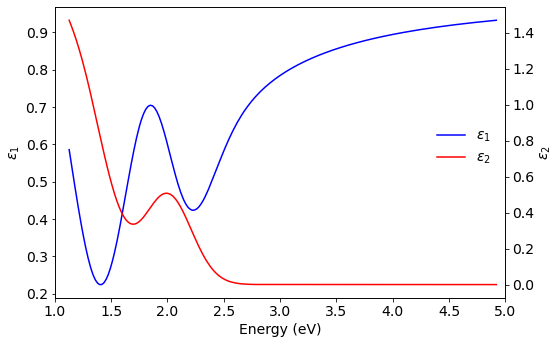

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(energy_range, e1, c='blue', label='$\\varepsilon_1$')

axt = ax.twinx()
axt.plot(energy_range, e2, c='red', label='$\\varepsilon_2$')

ax.set(ylabel='$\\varepsilon_1$', xlabel='Energy (eV)', xlim=(1,5))
axt.set_ylabel('$\\varepsilon_2$')

fig.legend(loc = (0.77,0.5), bbox_transform=ax.transAxes, frameon=False)
fig.tight_layout()

## Plotting $n, k$ as a function of wavlegnth

In [8]:
ri = np.sqrt(e)
n = ri.real
k = ri.imag

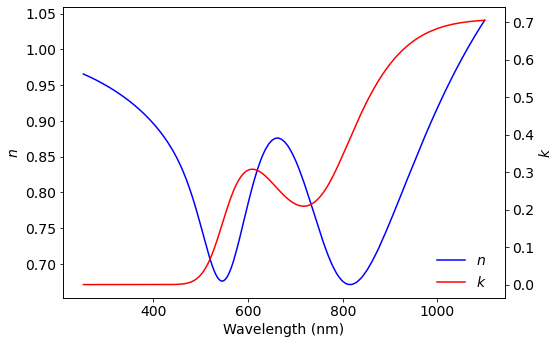

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(wavelength_range, n, c='blue', label='$n$')

axt = ax.twinx()
axt.plot(wavelength_range, k, c='red', label='$k$')

ax.set(ylabel='$n$', xlabel='Wavelength (nm)')
axt.set_ylabel('$k$')

fig.legend(loc = (0.77,0.14), bbox_transform=ax.transAxes, frameon=False)
fig.tight_layout()